In [1529]:
# Let's import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1530]:
# Loading the data for the house analytics from the CSV file 
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Understanding 

In [1531]:
house.shape

(1460, 81)

In [1532]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1533]:
# As per Data Dic ,the below columns are catgorical , but as above is numeric ; converting it to object data type

#  MSSubClass     1460 non-null   int64 
#  OverallQual    1460 non-null   int64  
#  OverallCond    1460 non-null   int64 

house[['MSSubClass','OverallQual' ,'OverallCond']]=house[['MSSubClass','OverallQual' ,'OverallCond']].astype('object')

house[['MSSubClass','OverallQual' ,'OverallCond']].dtypes


MSSubClass     object
OverallQual    object
OverallCond    object
dtype: object

In [1534]:
# Checking NANs /Columns with null values
columnswithnull= house.isna().sum()
print(columnswithnull[columnswithnull!=0])

# Checking for columns with null value - as this would give problem while building model
# Couldnt find column with "all NANs" , but some values as NAN - to be cleaned up !!

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [1535]:
# analysing the numerical columns with NAN

#LotFrontage: Linear feet of street connected to property

print(house.LotFrontage.mean())  # NAN values of this column to be replaced by mean !!

#  replacing NAN with mean

house['LotFrontage'].fillna(house['LotFrontage'].mean(), inplace=True)

columnswithnull= house.isna().sum()

print(columnswithnull[columnswithnull!=0])



70.04995836802665
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [1536]:
#MasVnrArea: Masonry veneer area in square feet  

print(house.MasVnrArea.median()) # MasVnrType for this row also seems to NAN !!
# NAN values of this column to be replaced by mean ; since many of the values are 0 for this columns

house['MasVnrArea'].fillna(house['MasVnrArea'].mean(), inplace=True)

columnswithnull= house.isna().sum()

print(columnswithnull[columnswithnull!=0])


0.0
Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [1537]:
#GarageYrBlt: Year garage was built , where it is Null , taking it same as median

print(house['GarageYrBlt'].median())

house['GarageYrBlt'].fillna(house['GarageYrBlt'].median(), inplace=True)

columnswithnull= house.isna().sum()

print(columnswithnull[columnswithnull!=0])



1980.0
Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [1538]:
# PoolQC and PoolArea - seems to be nan and zero respectively - retaining same as it might have an impact on cost ,
#the data seems genuine
print(house.PoolQC.value_counts())
house.PoolArea.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

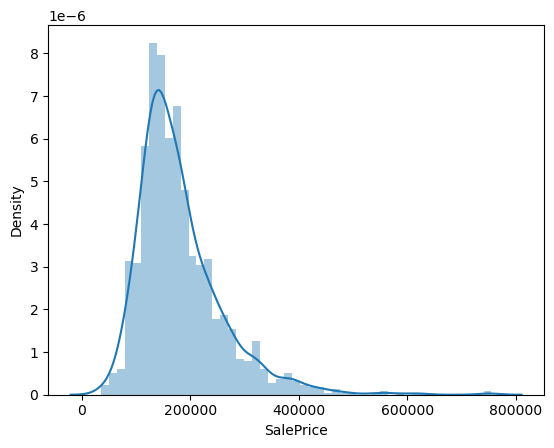

In [1539]:
# target variable: Sale price of house ; seems bit skewed towards Right 
sns.distplot(house['SalePrice'])
plt.show()

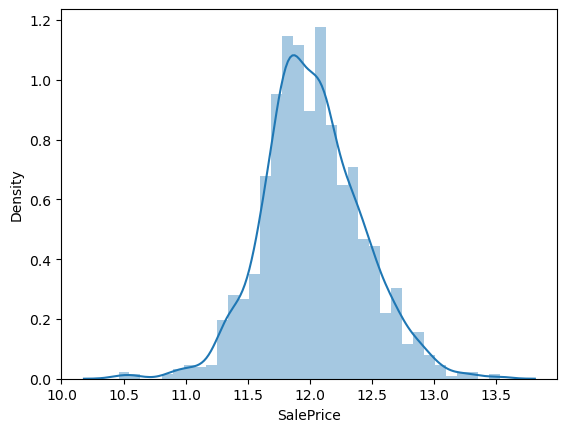

In [1540]:
# target variable: Sale price of house ; seems bit skewed towards Right 
#Considering the skewedness and peak of the target variable , seems better off if it log transformed !!;


sns.distplot(np.log(house['SalePrice']))
plt.show()

# Data Exploration

#To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

#Getting  list of all (independent) numeric variables, and visualise using pairwise plot.


In [1541]:
# outliers analysis 
house.describe()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,22.024023,9981.264932,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,70.049958,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1542]:
# MoSold: Month Sold (MM), YrSold: Year Sold (YYYY) ,YearBuilt: Original construction date 
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
# GarageYrBlt: Year garage was built

# Plan to retain these as numeric and use scaling 


In [1543]:
# all numeric (float and int) variables in the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


In [1544]:
# dropping ID column
house_numeric = house_numeric.drop(['Id'], axis=1)
house_numeric.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000


<AxesSubplot:>

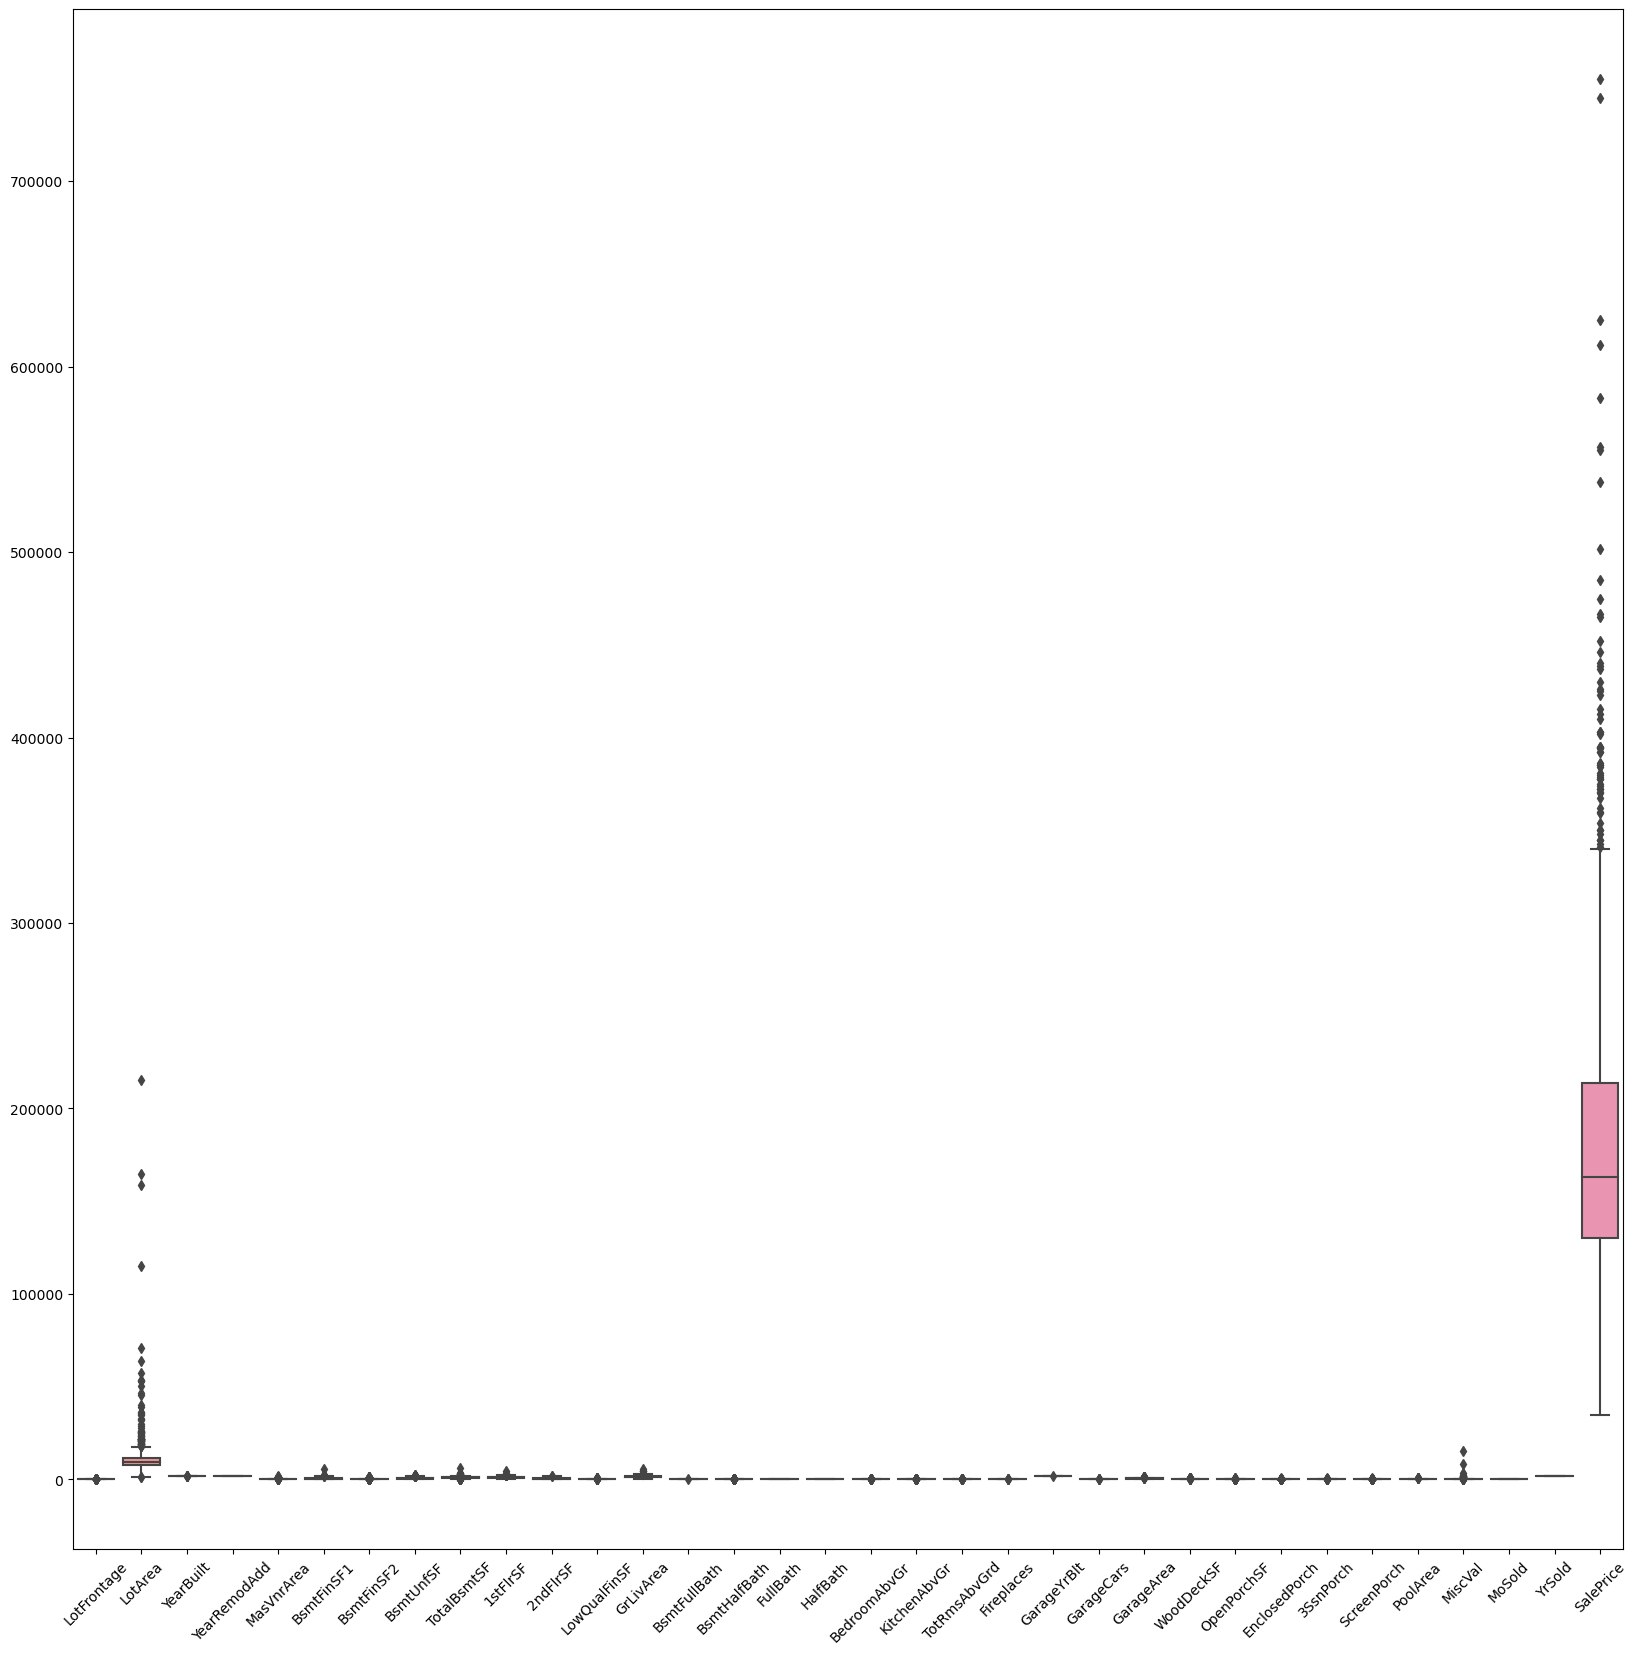

In [1545]:
# It appears that few columns have outliers 

plt.figure(figsize=[20,20])
plt.xticks(rotation=45)
sns.boxplot(data=house_numeric)

In [1546]:
# correlation matrix
cor = house_numeric.corr()
cor

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.306795,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,...,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
LotArea,0.306795,1.000000,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,0.117598,0.014228,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.082746,0.013788,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.179283,0.103960,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,...,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmtFinSF1,0.215828,0.214103,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,0.043340,0.111170,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,0.122156,-0.002618,0.149040,0.181133,0.114184,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,0.363358,0.260833,0.391452,0.291066,0.362452,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.414266,0.299475,0.281986,0.240379,0.342160,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


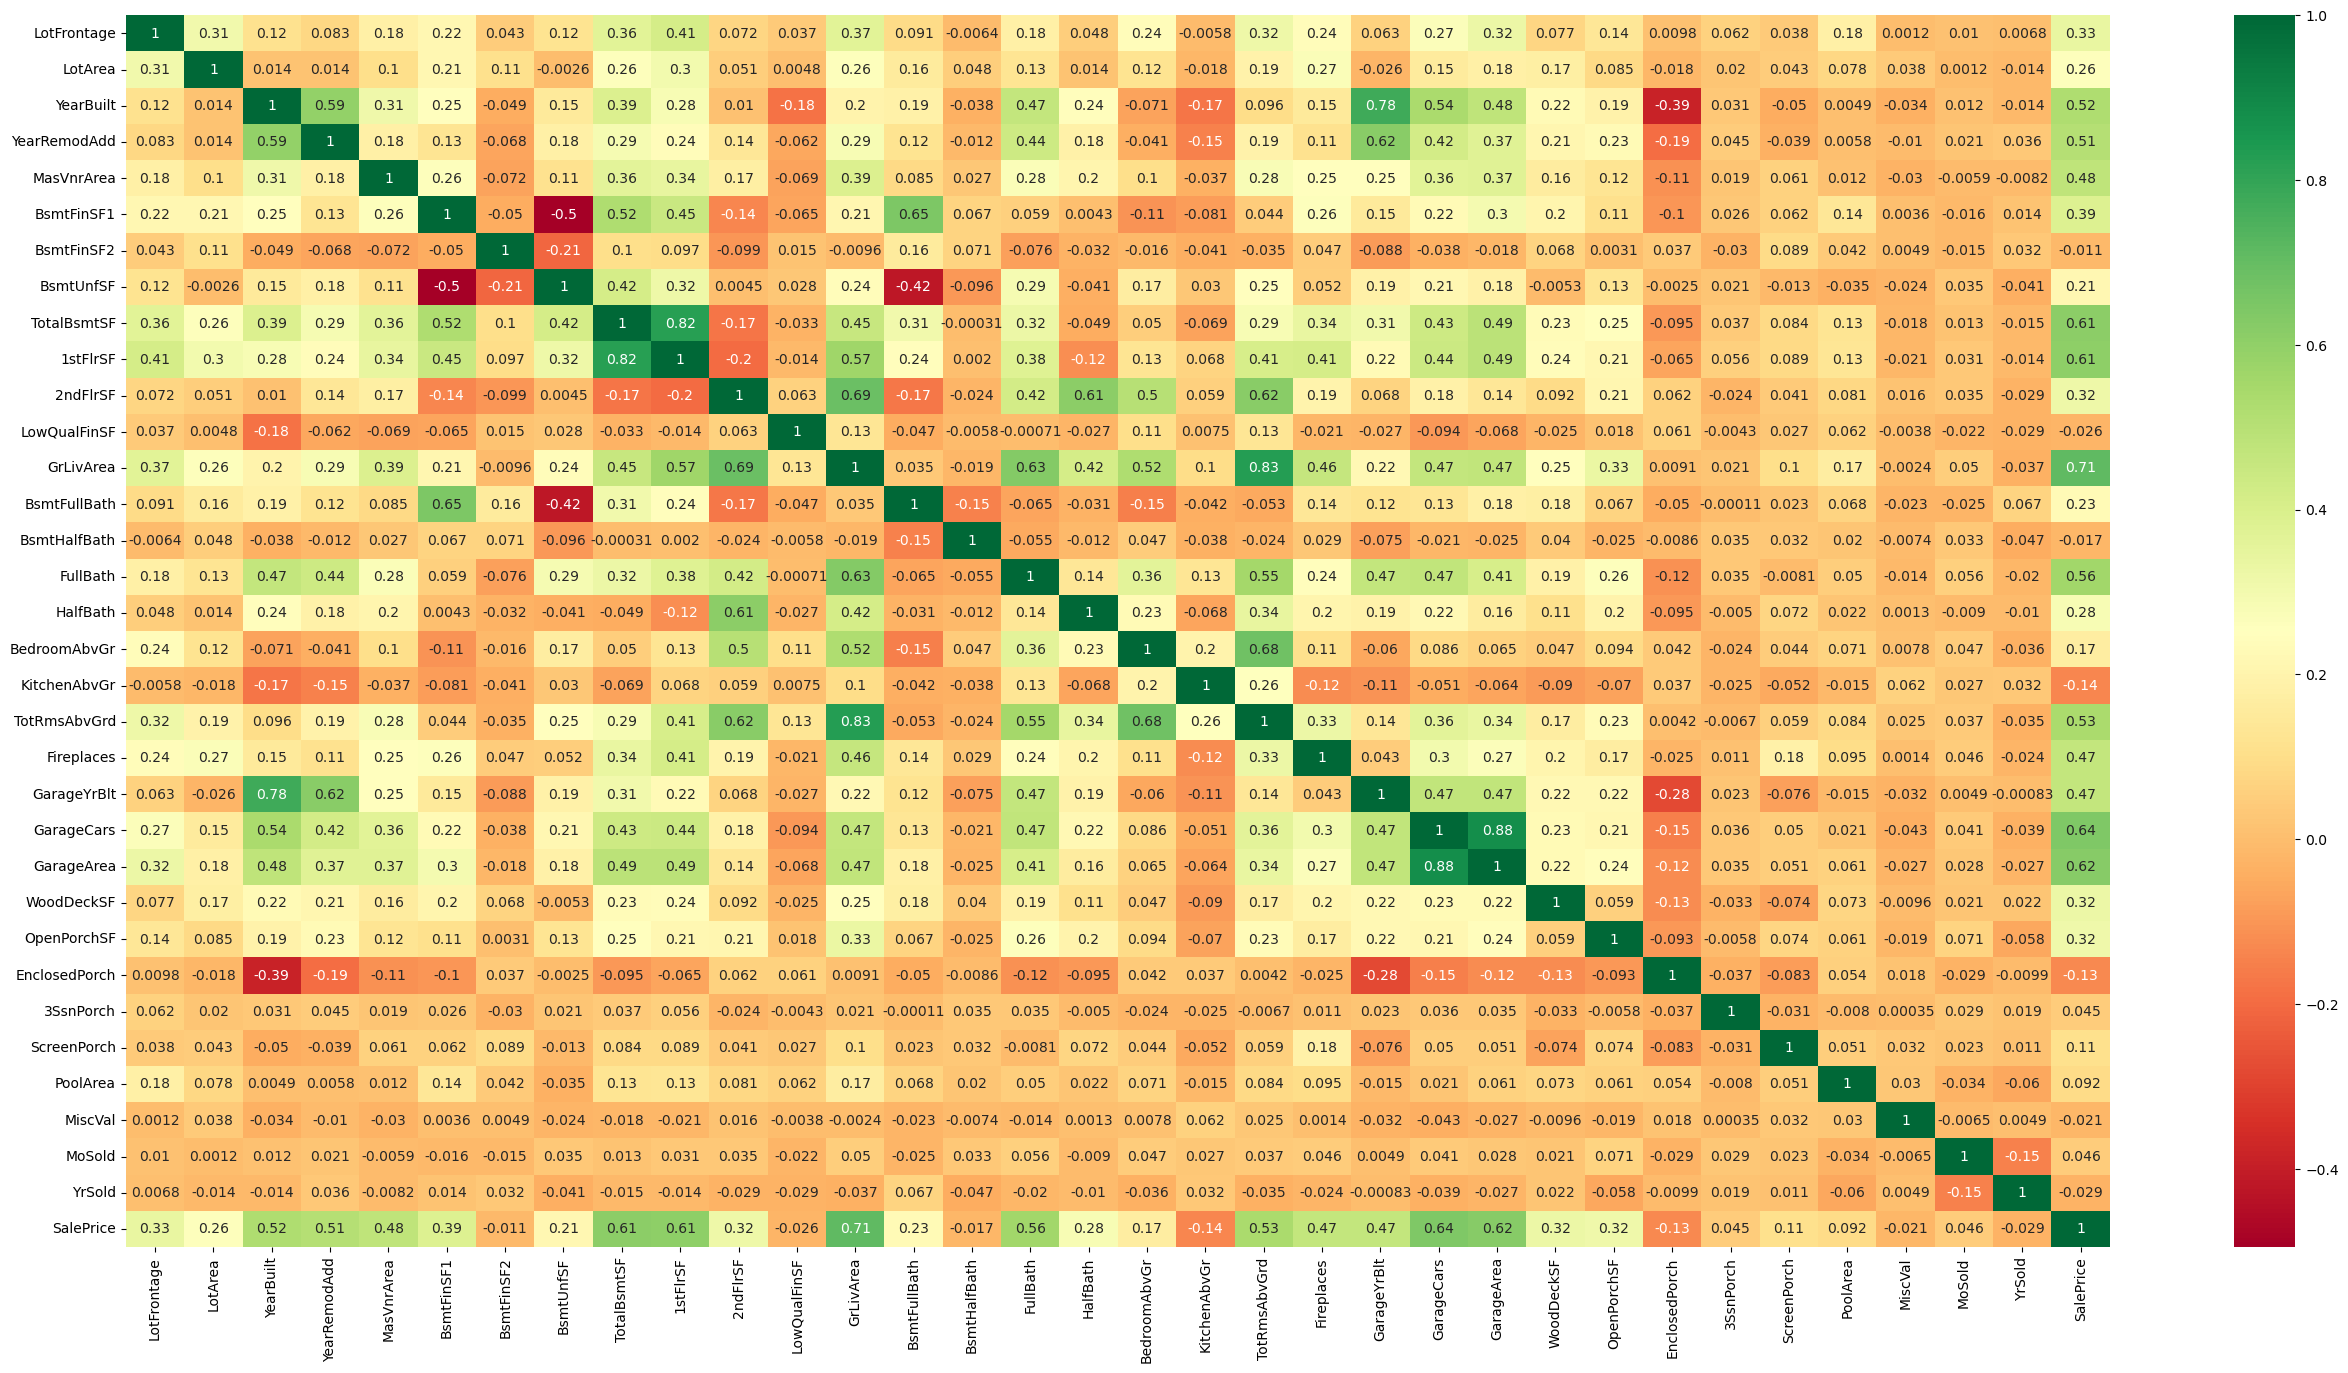

In [1547]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(32,16))

# heatmap
sns.heatmap(cor, cmap="RdYlGn", annot=True)
plt.show()


Analysis findings - correlation between SalePrice (y) and independent variables (X)

Strong relation :
    
    TotalBsmtSF: Total square feet of basement area
    GrLivArea
    FullBath: Full bathrooms above grade
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    YearBuilt   
    YearRemodAdd  
    
Moderate relation :
    
    LotFrontage
    LotArea
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    BsmtFinSF1: Type 1 finished square feet

In [1548]:
# split into X and y variables

X = house.drop(['Id','SalePrice'],axis=1).copy() # predictors in variable X

y = house['SalePrice'] # response variable in Y

X.head()
 

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Data Preparation

In [1549]:
# All columns other than Id and SalePrice have copied into X.
# creating dummy variables for categorical variables

house_categorical = X.select_dtypes(include=['object'])
house_categorical.head()


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [1550]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

# Dealing with NAN values in categorical variables 

In [1551]:
# understanding categorical values which are majority NAN

columnswithnull= house_categorical.isna().sum()

print(columnswithnull[columnswithnull!=0])
print(len(house_categorical))
house_categorical.shape

Alley           1369
MasVnrType         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
1460


(1460, 46)

In [1552]:
# interestingly -majority of values are NAN - do we need these variables PoolQC , Fence ,  MiscFeature 
# not deleting , but doing some clean up - since there is a 'cost' associated which can impact sale price!!
# Going through DD provided it is found that the below categorical variable can be assigned NA , hence replacing NANs with'NA
      

house_categorical.fillna({'BsmtExposure':'NA','BsmtFinType1':'NA','BsmtFinType2':'NA','GarageType':'NA','GarageFinish':'NA','GarageQual':'NA',
                         'GarageCond':'NA','BsmtQual':'NA','BsmtCond':'NA','Alley':'NA','FireplaceQu':'NA','MiscFeature':'NA',
                         'Fence':'NA','PoolQC':'NA'},inplace=True)


# checking after corrections on NAN 

columnswithnan= house_categorical.isna().sum()

print(columnswithnan[columnswithnan!=0])


MasVnrType    8
Electrical    1
dtype: int64


In [1553]:
#MasVnrType - as per DD , takes 'None' ; hence replacing NANs with 'None'       
# Before      
print(house_categorical.MasVnrType.value_counts())     
# After 
house_categorical['MasVnrType'].fillna("None", inplace=True)

# checking after filling NAN
print(house_categorical.MasVnrType.value_counts())


None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [1554]:
#Electrical  - as per DD , takes below values
#SBrkr	Standard Circuit Breakers & Romex
 #      FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
  #     FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
   #    FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
    #   Mix	Mixed
# Before      
print(house_categorical.Electrical.value_counts())     
# After 
house_categorical['Electrical'].fillna('SBrkr', inplace=True)  # replacing with std value

# checking after filling NAN
print(house_categorical.Electrical.value_counts())


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [1555]:
# checking the categorical values once again before creating dummies
house_categorical.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [1556]:
# convert into dummies - one hot encoding
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [1557]:
house_dummies.shape

(1460, 254)

In [1558]:
house_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 254 entries, MSSubClass_30 to SaleCondition_Partial
dtypes: uint8(254)
memory usage: 362.3 KB


In [1559]:
# drop categorical variables 
X = X.drop(list(house_categorical.columns), axis=1)

In [1560]:
# And Concatenating the dummies 
X = pd.concat([X, house_dummies], axis=1)

In [1561]:
# scaling the features 

from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

num_cols = list(X_train.select_dtypes(include=['float64', 'int64']).columns)

X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

In [1562]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)



# Model Building 

In [1563]:
# Linear Regression 
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [1564]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-2867858.2471382236
[ 9.14887991e+01  6.82317848e-01  4.41544408e+02  1.28511573e+02
  1.70677337e+01  1.55735299e+01  1.22099408e+01 -1.08826969e+00
  2.66959684e+01  1.83722501e+01  3.67053152e+01 -1.72059268e+01
  3.78710045e+01  1.60993080e+03  3.05619089e+02  1.85752523e+03
 -2.75073876e+03 -1.83837857e+03 -1.70024709e+04 -9.14869605e+02
  9.62729337e+02 -8.51970800e+00  3.35265117e+03  1.38502210e+01
  6.97062717e+00  2.51636704e+01  1.98363923e+01  3.46283918e+01
  2.42809733e+01  4.96691982e+03  4.62988761e+00 -3.53060765e+02
 -4.91109333e+02  3.02143754e+03 -7.40860135e+03 -7.45891546e+03
 -3.13384914e+03  2.41743035e+03  3.30847234e+03  1.48908136e+03
 -5.57525782e+03 -1.05399431e+04 -5.77152812e+03 -6.81324288e+02
 -3.00065180e+03 -2.77928650e+03 -5.94108933e+03  3.11570380e+04
  3.38670585e+04  3.22074925e+04  2.74021109e+04  2.54865924e+04
  1.88756596e+03  2.09726040e+03  2.56055885e+03  4.37019318e+03
  1.32269481e+03 -3.53593615e+03 -8.64865873e+03  2.46460917e+03
 -1.8

In [1565]:
from sklearn.metrics import r2_score, mean_squared_error

In [1566]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.95917145489077
0.5514364375816118
260514648762.85852
1264371734047.2888
255156365.09584576
2886693456.72897


#Scores are not in comparable state !

# Ridge & Lasso Regression 


# Ridge 

In [1567]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20, 50, 100,200, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20,
                                   50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1568]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [1569]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.19296992e+02  4.22031030e-01  3.54077777e+02  1.83974931e+02
  2.26036734e+01 -1.77034226e+00  8.33420918e+00  5.26081215e-01
  7.08994817e+00  1.86035450e+01  4.00417392e+01 -2.51518342e+01
  3.34934485e+01  6.85974443e+03  1.96011586e+03  5.56919774e+03
  6.88498766e+01 -2.20530884e+03 -1.23070821e+04  3.85390379e+02
  4.70373653e+03 -3.27187471e+01  1.26601463e+04 -1.24759670e+00
  1.48520502e+01 -2.44089697e+00  1.96893957e+01  5.28605652e+01
  3.36078423e+01 -2.71312157e+01  3.06866293e-01 -2.76291771e+02
 -7.17877957e+02 -1.99094147e+03  9.77617889e+02  3.59028540e+03
  9.77929647e+01 -5.02486186e+03  4.56298533e+03 -2.75918683e+02
  1.11151336e+02 -2.53104894e+02 -3.40037568e+03 -8.34840365e+03
 -7.46797227e+03 -2.42128336e+03 -4.36628887e+03  4.15593254e+03
  1.79799046e+03  5.21279625e+03 -1.45138406e+03  2.94691034e+03
  9.10223879e+02 -7.22144433e+02  2.32202775e+03 -7.40794611e+03
  8.10537620e+02  6.46725295e+03  4.30338865e+03  1.02737323e+04
 -1.40770786e+03  7.52787

In [1570]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8887998044240099
0.8626659437950351
709534954413.3352
387105225068.76965
694941189.435196
883801883.7186521


# Lasso

In [1571]:
lasso = Lasso()

model_cv_2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_2.fit(X_train, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20,
                                   50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1572]:
# Printing the best hyperparameter alpha
print(model_cv_2.best_params_)

{'alpha': 100}


In [1573]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [1574]:
lasso.coef_

array([ 2.69377590e+01,  3.98850538e-01,  3.91299490e+02,  1.80645415e+02,
        1.73909988e+01,  2.34534619e+01,  2.11956489e+01,  1.24556925e+01,
        7.42768878e+00,  4.67475694e+01,  6.17860004e+01, -1.01040123e+01,
        7.40935066e+00,  3.44303988e+03,  0.00000000e+00,  2.38716896e+03,
       -9.39299603e+02, -2.57098294e+03, -2.18107386e+04, -0.00000000e+00,
        3.33596344e+03,  4.00434284e+01,  5.76678168e+03,  4.64871646e+00,
        7.91228398e+00,  7.94445617e+00,  1.28299634e+01,  4.16443727e+01,
        2.61583554e+01,  4.05272006e+01,  1.13276844e-01, -3.21548494e+02,
       -1.29402097e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.04409691e+02, -0.00000000e+00,  4.04879917e+02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -2.34661856e+02, -0.00000000e+00, -5.61465248e+02,  0.00000000e+00,
        0.00000000e+00,  4.63306822e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [1575]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9406956217071538
0.6490973111880127
378403375376.89734
989093805887.9673
370620348.06748027
2258205036.273898


In [1576]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.591715e-01,8.887998e-01,9.406956e-01
1,R2 Score (Test),5.514364e-01,8.626659e-01,6.490973e-01
2,RSS (Train),2.605146e+11,7.095350e+11,3.784034e+11
3,RSS (Test),1.264372e+12,3.871052e+11,9.890938e+11
4,MSE (Train),1.597361e+04,2.636174e+04,1.925150e+04
5,MSE (Test),5.372796e+04,2.972881e+04,4.752057e+04


# Comparing Coefficients 

In [1577]:
betas = pd.DataFrame(index=X.columns)

In [1578]:
betas.rows = X.columns

In [1579]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [1580]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,91.488799,-119.296992,26.937759
LotArea,0.682318,0.422031,0.398851
YearBuilt,441.544408,354.077777,391.299490
YearRemodAdd,128.511573,183.974931,180.645415
MasVnrArea,17.067734,22.603673,17.390999
BsmtFinSF1,15.573530,-1.770342,23.453462
BsmtFinSF2,12.209941,8.334209,21.195649
BsmtUnfSF,-1.088270,0.526081,12.455692
TotalBsmtSF,26.695968,7.089948,7.427689
1stFlrSF,18.372250,18.603545,46.747569


In [1581]:
betas['max']= betas.max(axis=1)

In [1582]:
betas.head(70)

,Linear,Ridge,Lasso,max
LotFrontage,91.488799,-119.296992,26.937759,91.488799
LotArea,0.682318,0.422031,0.398851,0.682318
YearBuilt,441.544408,354.077777,391.299490,441.544408
YearRemodAdd,128.511573,183.974931,180.645415,183.974931
MasVnrArea,17.067734,22.603673,17.390999,22.603673
BsmtFinSF1,15.573530,-1.770342,23.453462,23.453462
BsmtFinSF2,12.209941,8.334209,21.195649,21.195649
BsmtUnfSF,-1.088270,0.526081,12.455692,12.455692
TotalBsmtSF,26.695968,7.089948,7.427689,26.695968
1stFlrSF,18.372250,18.603545,46.747569,46.747569


In [1583]:
betas.sort_values(by = ['Lasso'],ascending =False)

,Linear,Ridge,Lasso,max
OverallQual_10,7.651127e+04,18805.394845,87304.424586,8.730442e+04
OverallQual_9,3.757838e+04,23024.693388,55091.335268,5.509134e+04
RoofMatl_WdShngl,9.766992e+04,14077.819014,39581.904475,9.766992e+04
Neighborhood_Crawfor,2.644699e+04,14288.956884,24234.321665,2.644699e+04
Neighborhood_NoRidge,1.795361e+04,20625.497554,24010.757868,2.401076e+04
OverallQual_8,4.754554e+03,8570.012280,22189.497656,2.218950e+04
Exterior1st_BrkFace,2.099504e+04,10016.714795,17258.013574,2.099504e+04
OverallCond_9,3.241119e+04,8404.858635,15626.290905,3.241119e+04
BsmtExposure_Gd,1.359839e+04,14927.030261,14587.755026,1.492703e+04
SaleType_New,1.240916e+04,5398.258016,14467.495930,1.446750e+04


In [1584]:
betas['Lasso'].sort_values(ascending = False) [:5]

OverallQual_10          87304.424586
OverallQual_9           55091.335268
RoofMatl_WdShngl        39581.904475
Neighborhood_Crawfor    24234.321665
Neighborhood_NoRidge    24010.757868
Name: Lasso, dtype: float64

# Re-doing Ridge & Lasso regression for double with alpha 

In [1585]:
#Fitting Ridge model for alpha = 40 and printing coefficients which have been penalised
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.09581191e+02  4.04843435e-01  3.73105018e+02  2.32070716e+02
  2.74567388e+01  3.24964728e-02  7.91565013e+00  1.37464154e+00
  9.32278811e+00  2.01234606e+01  3.82349145e+01 -2.51384258e+01
  3.32199487e+01  6.02229000e+03  1.36643856e+03  4.46873828e+03
  5.89689842e+01 -2.60836230e+03 -1.00295082e+04  4.02557343e+02
  5.38896934e+03 -3.65534246e+01  1.08959867e+04  7.53814154e+00
  1.71370887e+01 -2.21796192e+00  2.12375529e+01  5.05367392e+01
  3.47743784e+01 -4.45215291e+01  1.20134149e-01 -2.56513255e+02
 -7.76241629e+02 -1.19930758e+03  7.33863366e+02  2.64737821e+03
  5.00755945e+02 -3.73650080e+03  4.11560239e+03  1.56897951e+01
 -3.97524574e+02 -2.66054923e+02 -3.49481606e+03 -6.21721334e+03
 -5.88784455e+03 -1.46458267e+03 -3.50545958e+03  3.07778372e+03
  7.28571690e+02  4.28723039e+03 -2.78123650e+03  1.71641497e+03
  1.32855901e+03 -6.20996744e+02  1.53575730e+03 -5.40664847e+03
  2.94528268e+02  4.22235678e+03  2.31129691e+03  7.07219464e+03
 -7.79208220e+02  6.08561

In [1586]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8731941795475238
0.856196300239418
809109746327.8193
405341290425.88776
792467920.0076585
925436736.1321639


In [1587]:
#Fitting Ridge model for alpha = 200 and printing coefficients which have been penalised

alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=200)

In [1588]:
lasso.coef_

array([-2.89382916e+01,  3.96277682e-01,  3.66504178e+02,  2.48580964e+02,
        1.67134292e+01,  1.80184824e+01,  1.68281772e+01,  1.12259971e+01,
        6.63803659e+00,  4.51239552e+01,  6.03349373e+01, -7.65302441e+00,
        7.23944730e+00,  4.03922980e+03,  0.00000000e+00,  2.56801188e+03,
       -0.00000000e+00, -1.81794909e+03, -2.18940461e+04,  0.00000000e+00,
        4.79390858e+03,  2.69563620e+01,  7.50621395e+03,  4.05733086e+00,
        1.16401796e+01,  1.12612624e+00,  1.53195433e+01,  4.92764274e+01,
        3.07977744e+01,  2.64649294e+00, -8.58927418e-02, -3.17925216e+02,
       -3.05402004e+02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.31547699e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [1589]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9181687244870479
0.7723534773684242
522140721425.17065
641670105832.3003
511401294.2460046
1465000241.6262565


In [1590]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric_2 = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric_2


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.591715e-01,8.731942e-01,9.181687e-01
1,R2 Score (Test),5.514364e-01,8.561963e-01,7.723535e-01
2,RSS (Train),2.605146e+11,8.091097e+11,5.221407e+11
3,RSS (Test),1.264372e+12,4.053413e+11,6.416701e+11
4,MSE (Train),1.597361e+04,2.815081e+04,2.261418e+04
5,MSE (Test),5.372796e+04,3.042099e+04,3.827532e+04


In [1591]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.591715e-01,8.887998e-01,9.406956e-01
1,R2 Score (Test),5.514364e-01,8.626659e-01,6.490973e-01
2,RSS (Train),2.605146e+11,7.095350e+11,3.784034e+11
3,RSS (Test),1.264372e+12,3.871052e+11,9.890938e+11
4,MSE (Train),1.597361e+04,2.636174e+04,1.925150e+04
5,MSE (Test),5.372796e+04,2.972881e+04,4.752057e+04


In [1592]:
betas_2 = pd.DataFrame(index=X.columns)

In [1593]:
betas_2.rows = X.columns

In [1594]:
betas_2['Linear'] = lm.coef_
betas_2['Ridge'] = ridge.coef_
betas_2['Lasso'] = lasso.coef_

In [1595]:
pd.set_option('display.max_rows', None)
betas_2.head(68)

,Linear,Ridge,Lasso
LotFrontage,91.488799,-109.581191,-28.938292
LotArea,0.682318,0.404843,0.396278
YearBuilt,441.544408,373.105018,366.504178
YearRemodAdd,128.511573,232.070716,248.580964
MasVnrArea,17.067734,27.456739,16.713429
BsmtFinSF1,15.573530,0.032496,18.018482
BsmtFinSF2,12.209941,7.915650,16.828177
BsmtUnfSF,-1.088270,1.374642,11.225997
TotalBsmtSF,26.695968,9.322788,6.638037
1stFlrSF,18.372250,20.123461,45.123955


In [1596]:
betas_2.sort_values(by = ['Lasso'],ascending =False)

,Linear,Ridge,Lasso
OverallQual_10,7.651127e+04,11757.330572,68703.295527
OverallQual_9,3.757838e+04,17118.460685,52600.474067
Neighborhood_NoRidge,1.795361e+04,14582.570304,25798.147990
Neighborhood_Crawfor,2.644699e+04,10346.167111,23279.223367
OverallQual_8,4.754554e+03,7964.368271,20464.164029
RoofMatl_WdShngl,9.766992e+04,8077.130742,20396.769824
Neighborhood_NridgHt,7.434219e+03,14015.948372,14816.101149
BsmtExposure_Gd,1.359839e+04,12760.092988,14648.037915
Exterior1st_BrkFace,2.099504e+04,7223.590288,14284.945679
Functional_Typ,3.099477e+04,9053.357148,12903.403808


In [1597]:
betas_2['Lasso'].sort_values(ascending = False) [:5]

OverallQual_10          68703.295527
OverallQual_9           52600.474067
Neighborhood_NoRidge    25798.147990
Neighborhood_Crawfor    23279.223367
OverallQual_8           20464.164029
Name: Lasso, dtype: float64

In [1598]:
# 1. With increase in aplha - making it twice than what is suggested , 
#Ridge – The values of r2 for train and test was almost same
#Lasso – The values  of r2 reduced for train and test 


# 2.The top 5 parameters for LAsso  to be below ;

#OverallQual_10 ( Very Excellent )
#OverallQual_9  ( Excellent )
#Neighborhood_NoRidge  ( indicating location )
#Neighborhood_Crawfor
#OverallQual_8



# Dropping top parameters assuming that data is not available for these 

In [1599]:
top = ['OverallQual_10' ,'OverallQual_9','Neighborhood_NoRidge','Neighborhood_Crawfor' ,'OverallQual_8']

In [1600]:
X_train_new=X_train.drop(top,axis = 1)

In [1601]:
# Creating new LAsso ;
lasso = Lasso()

# cross validation
model_cv_3 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_3.fit(X_train_new, y_train) 

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15.0, 20,
                                   50, 100, 200, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [1602]:
# Printing the best hyperparameter alpha
print(model_cv_3.best_params_)

{'alpha': 100}


In [1603]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [1604]:
lasso.coef_

array([ 6.02463495e+01,  3.67524583e-01,  3.98101636e+02,  1.75921433e+02,
        2.79908752e+01,  2.65690178e+01,  2.10587105e+01,  1.55070069e+01,
        8.94436812e+00,  5.06657685e+01,  6.92882685e+01, -2.16946495e+01,
        8.31885998e+00,  3.31320300e+03, -0.00000000e+00,  2.69840916e+03,
       -2.05422104e+03, -3.67938489e+03, -2.55229521e+04, -0.00000000e+00,
        3.75765077e+03,  4.43203090e+01,  7.01079560e+03,  6.48962079e-01,
        9.69529647e+00,  1.08228573e+01,  9.42367093e+00,  2.89874432e+01,
        2.10515042e+01,  6.15190624e+01,  2.35908690e-01, -3.32337143e+02,
       -2.70108135e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.71594579e+03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.72134272e+02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.50937451e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [1605]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

X_test_new =X_test.drop(top,axis=1)

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9320851748560393
0.6308935372377764
433344043262.76544
1040405011621.1636
424430992.4219054
2375353907.810876


In [1606]:
lasso.coef_

array([ 6.02463495e+01,  3.67524583e-01,  3.98101636e+02,  1.75921433e+02,
        2.79908752e+01,  2.65690178e+01,  2.10587105e+01,  1.55070069e+01,
        8.94436812e+00,  5.06657685e+01,  6.92882685e+01, -2.16946495e+01,
        8.31885998e+00,  3.31320300e+03, -0.00000000e+00,  2.69840916e+03,
       -2.05422104e+03, -3.67938489e+03, -2.55229521e+04, -0.00000000e+00,
        3.75765077e+03,  4.43203090e+01,  7.01079560e+03,  6.48962079e-01,
        9.69529647e+00,  1.08228573e+01,  9.42367093e+00,  2.89874432e+01,
        2.10515042e+01,  6.15190624e+01,  2.35908690e-01, -3.32337143e+02,
       -2.70108135e+02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.71594579e+03, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -9.72134272e+02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  5.50937451e+03, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [1607]:
betas_3 = pd.DataFrame(index=X_train_new.columns)
betas_3.rows = X_train_new.columns
betas_3['Lasso'] = lasso.coef_
betas_3

,Lasso
LotFrontage,60.246350
LotArea,0.367525
YearBuilt,398.101636
YearRemodAdd,175.921433
MasVnrArea,27.990875
BsmtFinSF1,26.569018
BsmtFinSF2,21.058710
BsmtUnfSF,15.507007
TotalBsmtSF,8.944368
1stFlrSF,50.665768


In [1608]:
# Viewing top 5 co-efficients 

betas_3['Lasso'].sort_values(ascending = False) [:5]

RoofMatl_WdShngl       49543.858351
OverallCond_9          18797.166099
Exterior1st_BrkFace    16949.360262
BsmtExposure_Gd        16405.441430
Functional_Typ         15560.917020
Name: Lasso, dtype: float64